In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link = https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [28]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')



In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

In [32]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

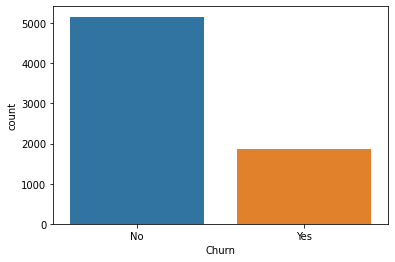

In [33]:
sns.countplot(data=df,x='Churn')

<AxesSubplot: xlabel='Churn', ylabel='TotalCharges'>

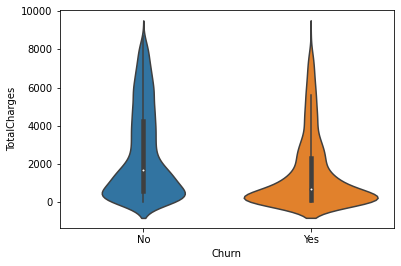

In [34]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

Boxplot showing the distribution of TotalCharges per Contract type

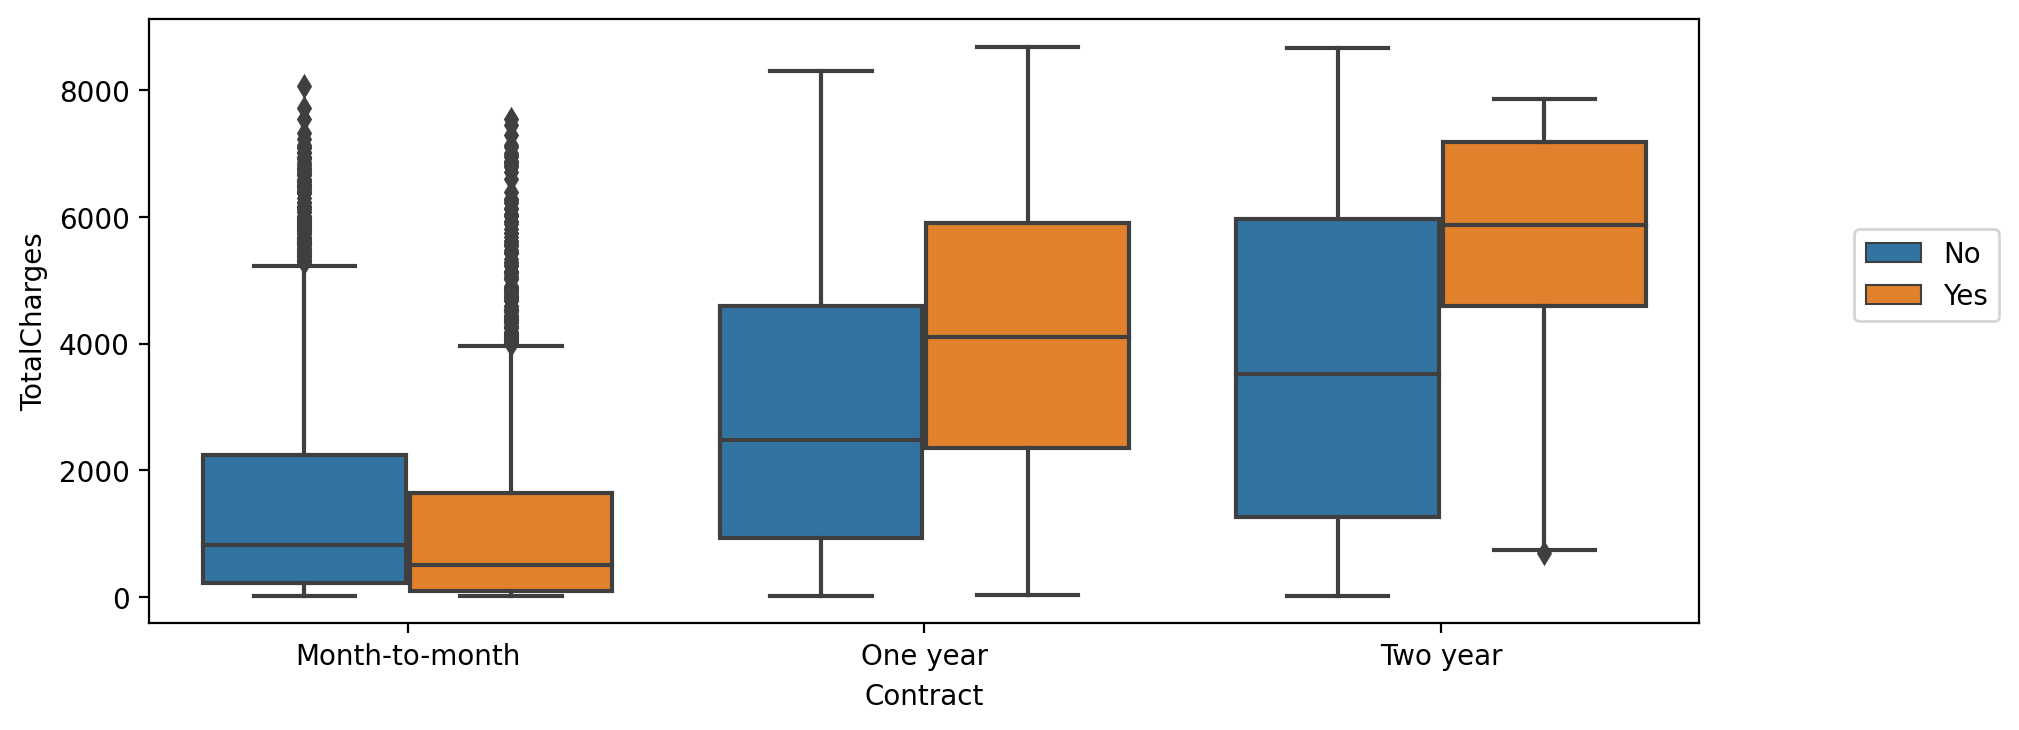

In [35]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

Calculating Correlation converting categorical variables into dummy variables first, as  correlation can be calaulated only for numeric features.

In [36]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [37]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

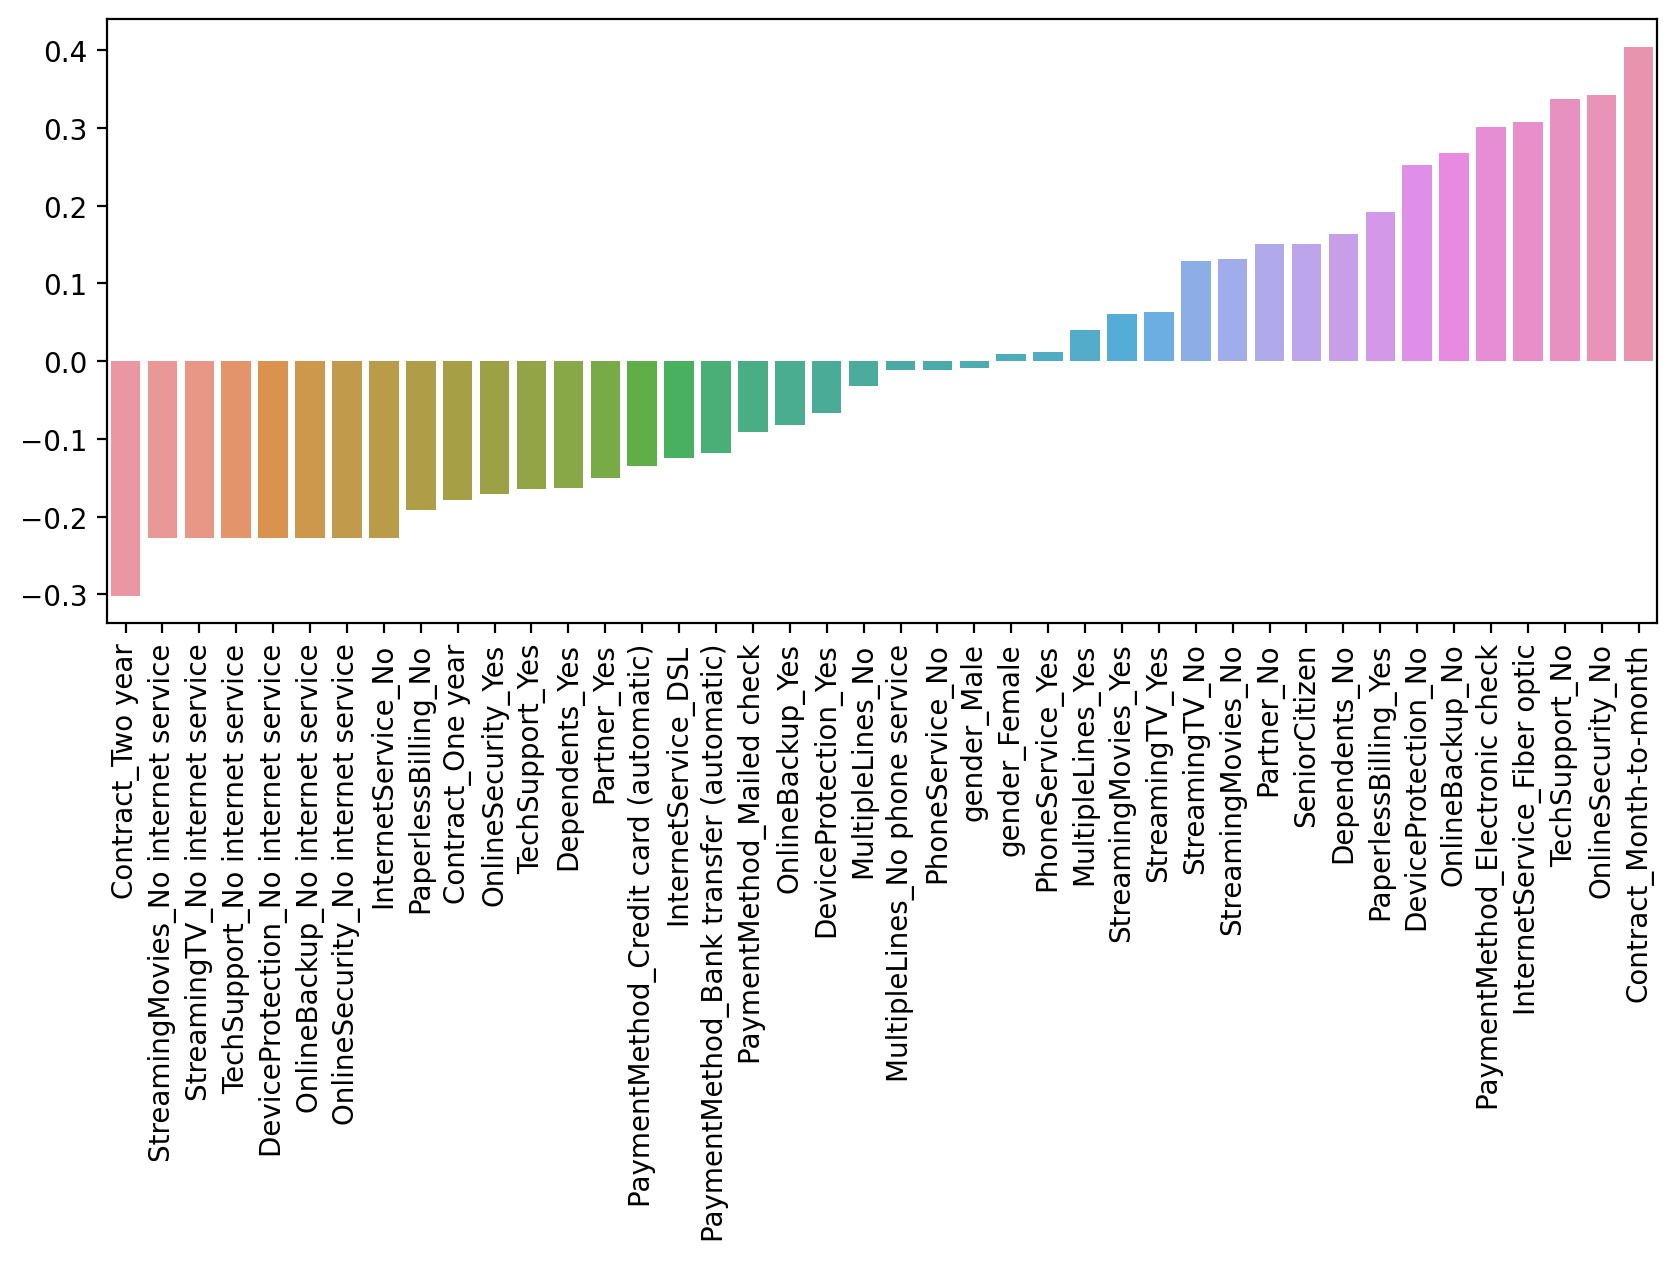

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.xticks(rotation=90);




# Churn Analysis

This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.


In [39]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Figure size 2000x600 with 0 Axes>

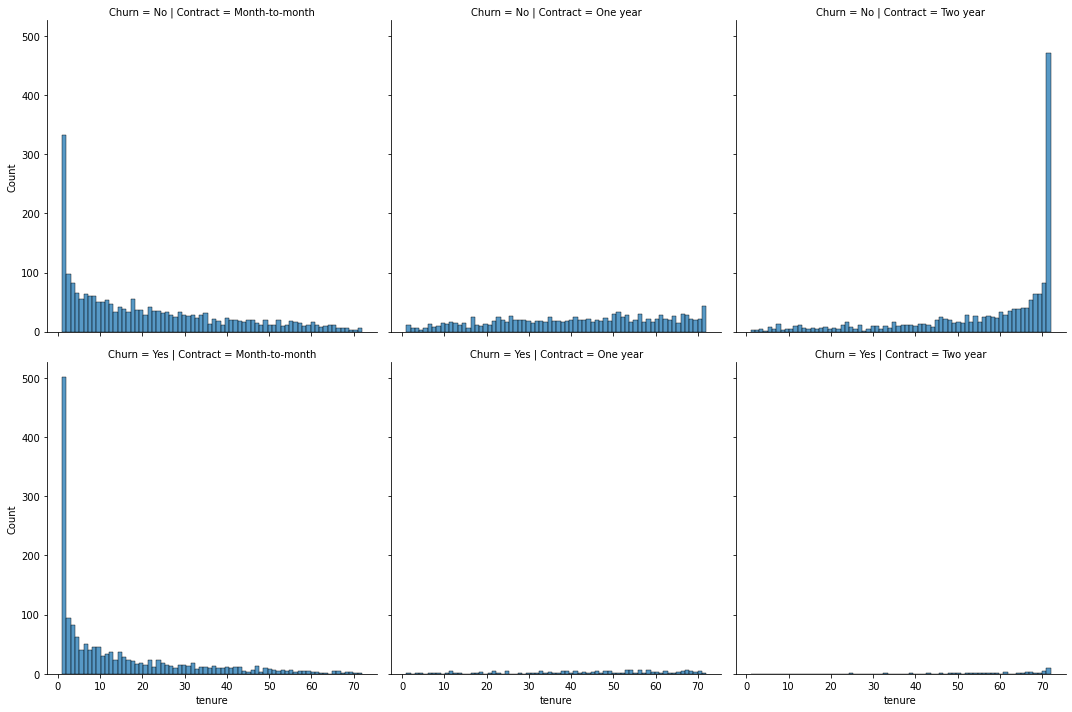

In [48]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

Total Charges vs Monthly Charges

<AxesSubplot: xlabel='TotalCharges', ylabel='MonthlyCharges'>

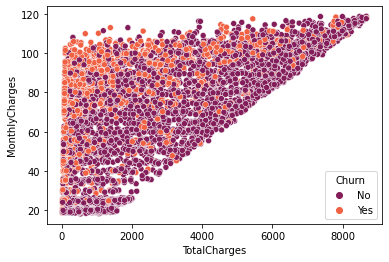

In [61]:
sns.scatterplot(data=df,x='TotalCharges',y='MonthlyCharges',hue='Churn',palette='rocket')

# Creating Cohorts

Treating each unique tenure group as a cohort, calculating the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.

In [62]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [63]:
churn_rate=100*yes_churn/(no_churn+yes_churn)

In [65]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [66]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [67]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort


<AxesSubplot: xlabel='TotalCharges', ylabel='MonthlyCharges'>

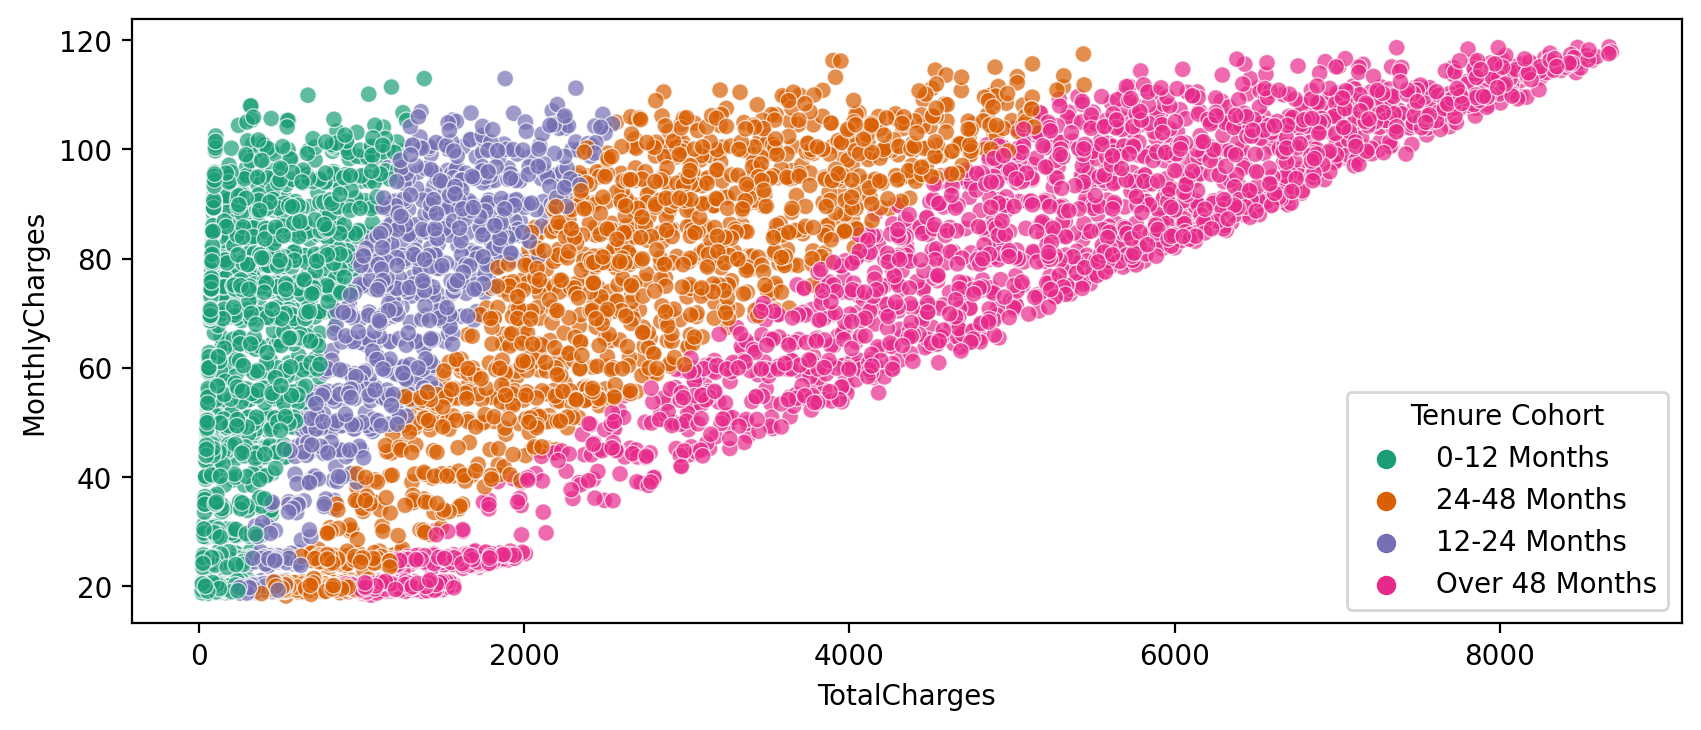

In [70]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='TotalCharges',y='MonthlyCharges',hue='Tenure Cohort',alpha=0.7,palette='Dark2')
        

<AxesSubplot: xlabel='Tenure Cohort', ylabel='count'>

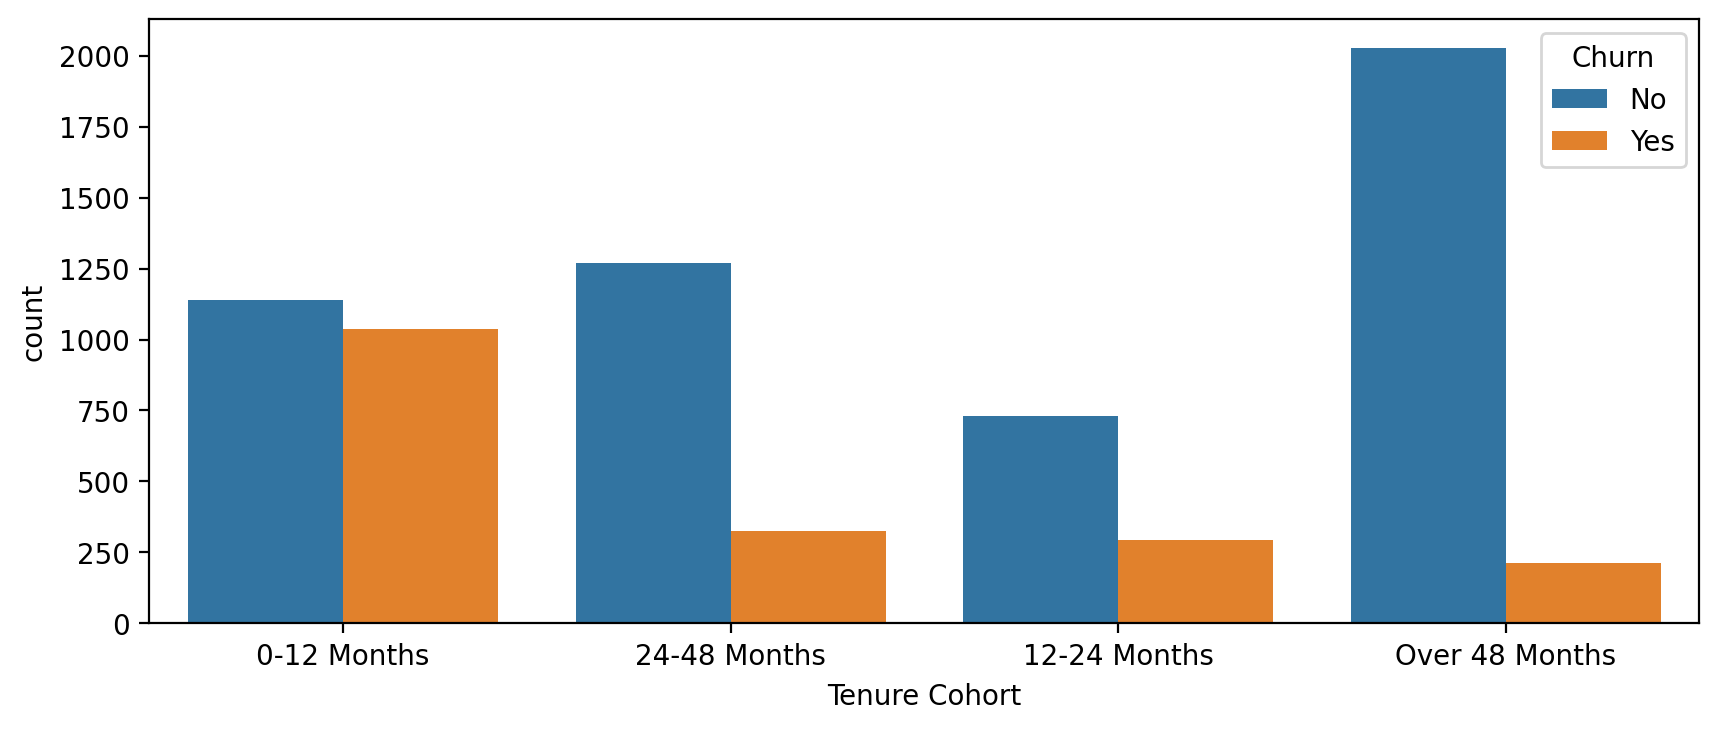

In [71]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

# Predictive Modeling


Decision Tree

In [72]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [73]:
y=df['Churn']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier(max_depth=6)

In [78]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [79]:
preds=dt.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [81]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



C:\Users\Abijith\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


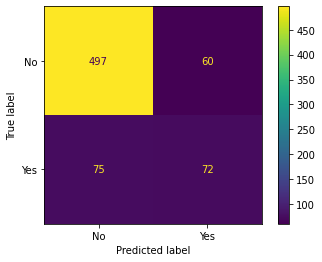

In [84]:
plot_confusion_matrix(dt,X_test,y_test);

In [85]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

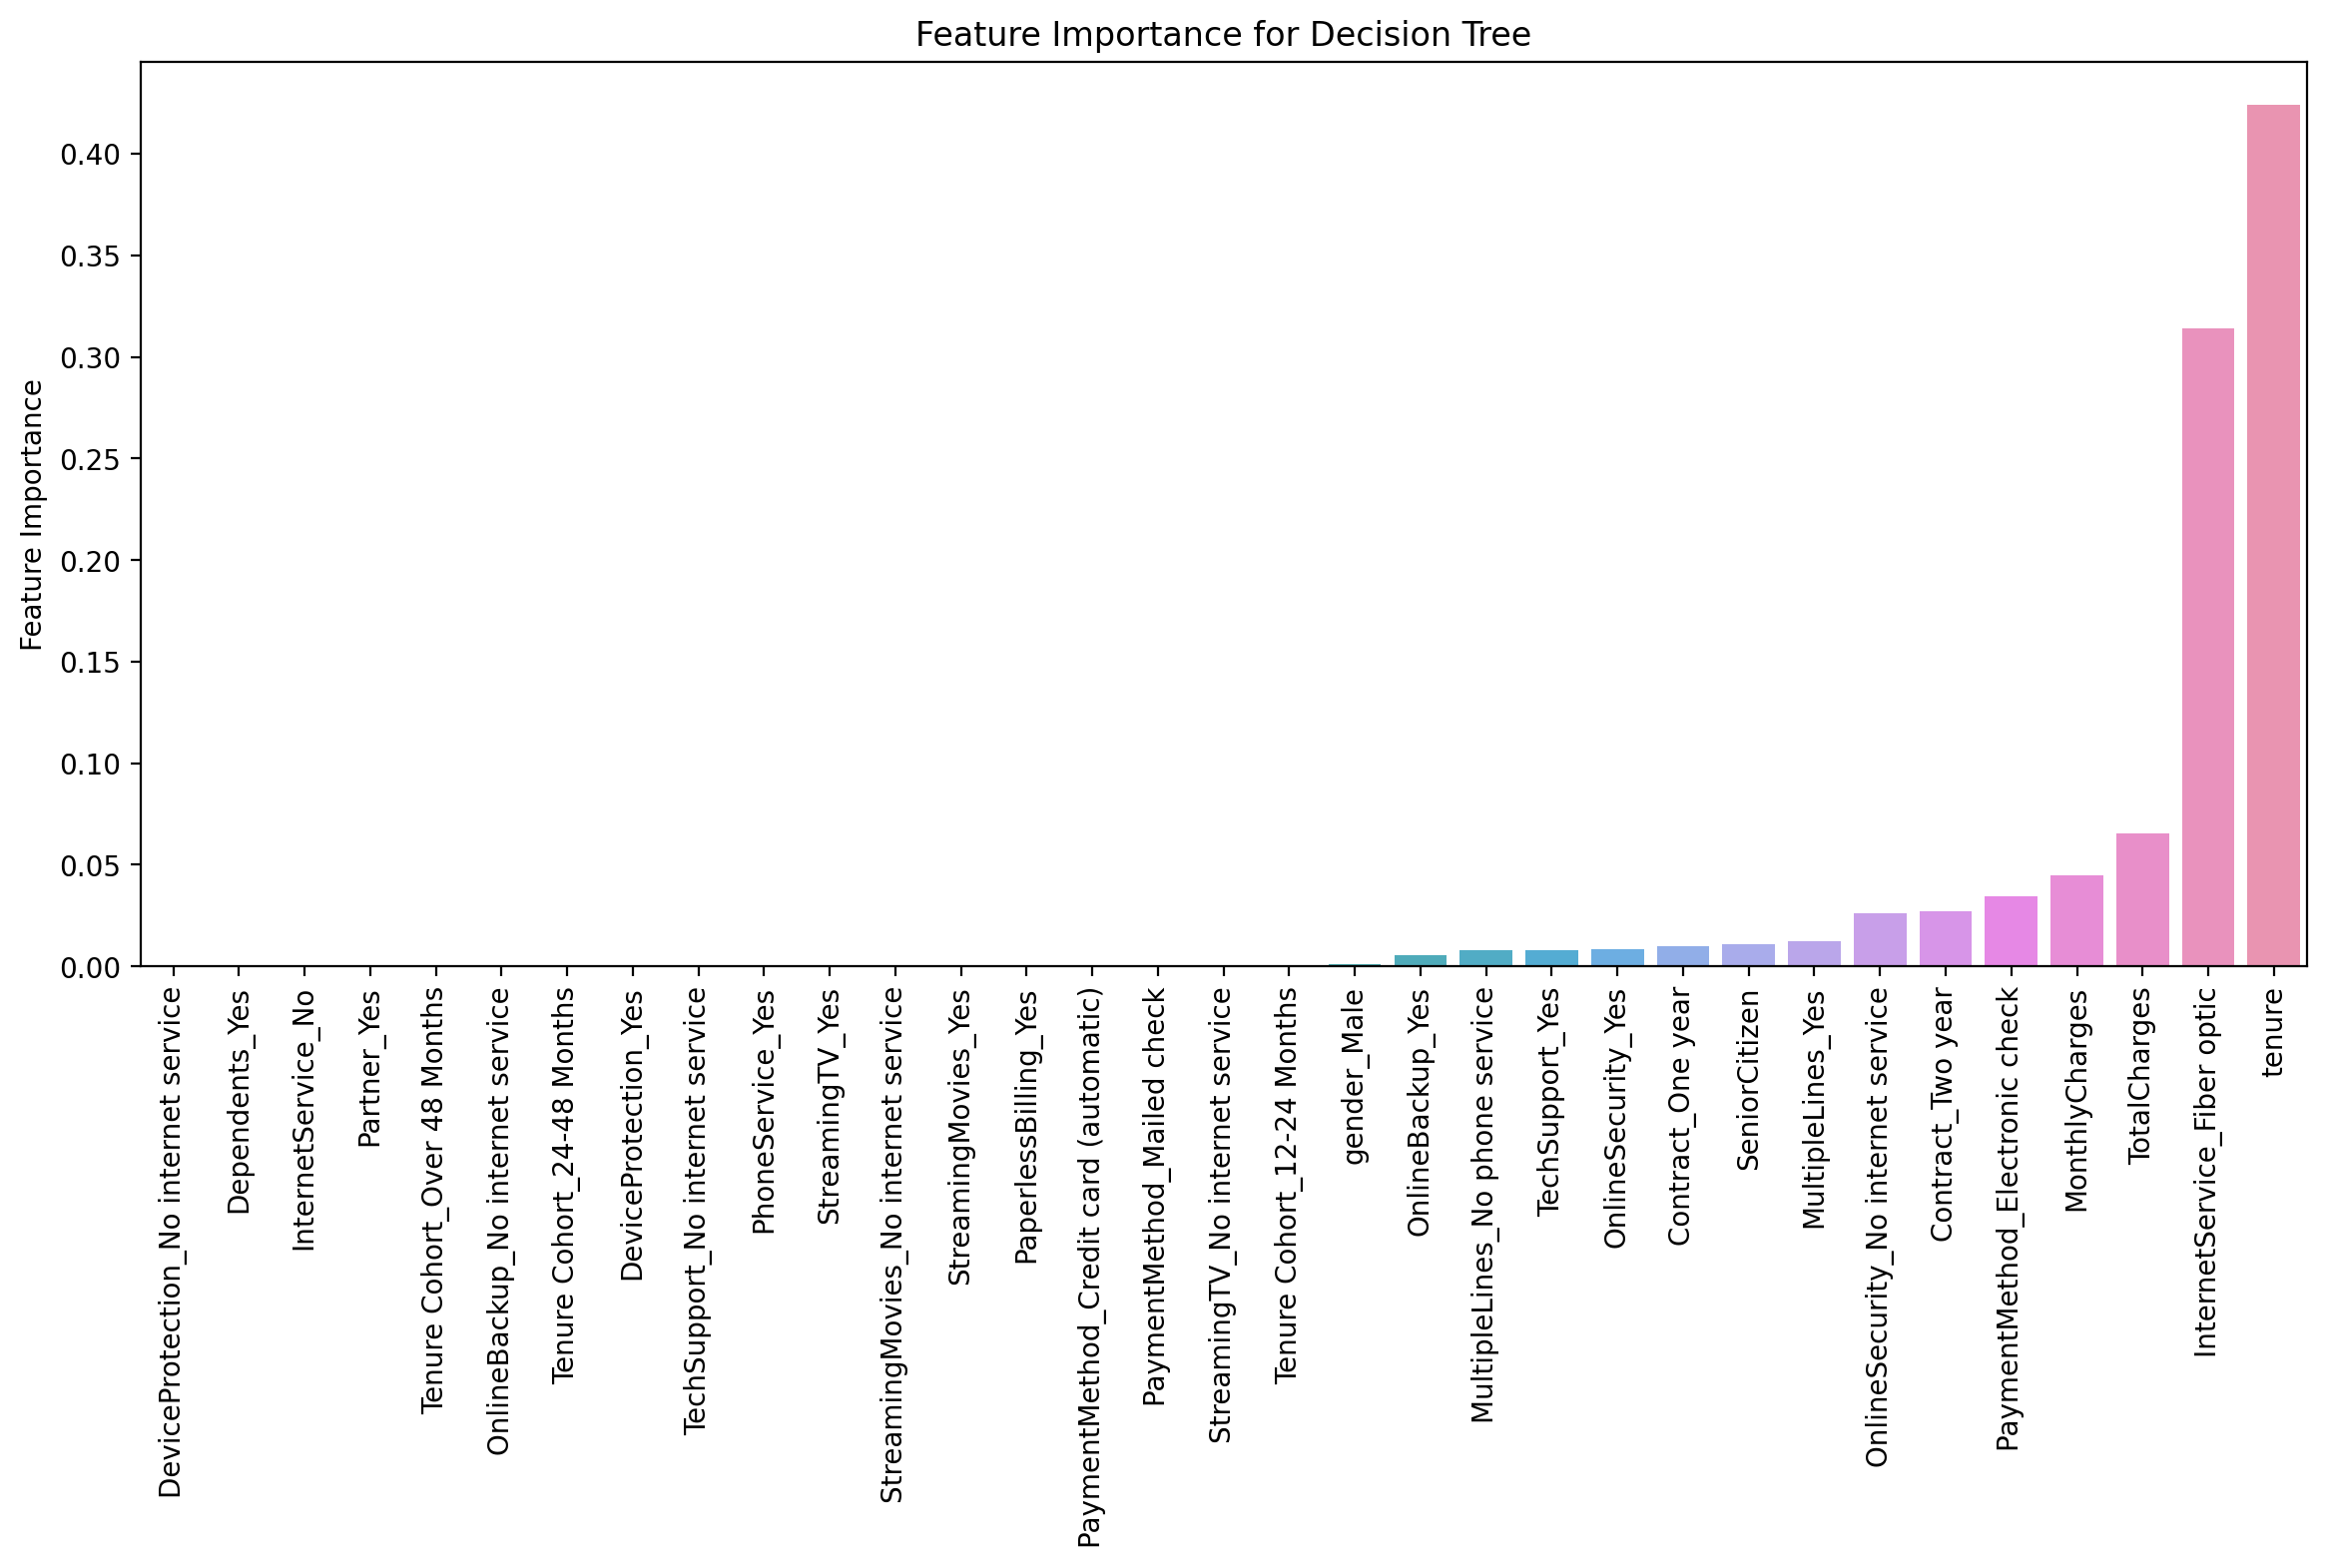

In [86]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(n_estimators=100)

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
preds=rf.predict(X_test)

In [98]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.49      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.67       704
weighted avg       0.78      0.79      0.78       704



C:\Users\Abijith\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


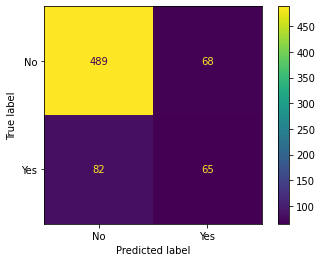

In [92]:
plot_confusion_matrix(rf,X_test,y_test)

Decision Tree Classifier is chosen as the model for prediction since it has more accuracy score (81%) than Random Forest.